In [0]:
import pandas as pd
import numpy as np
import tensorflow as tf
from keras.utils import to_categorical
from sklearn.preprocessing import OneHotEncoder
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import os

In [0]:
import keras

In [0]:
df1 = pd.read_csv("BC_Data1.csv")

In [0]:
X = pd.DataFrame(data=df1,columns= ['Age', 'Tumor Size','Nodes','KI67','Basal-like Score','Luminal A Score','Luminal B Score', 'HER2-enriched Score',
                                    'Normal Score','ESR1 Score','ERBB2 Score','PGR Score','Proliferation Score','Luminal Score',
                                    'ACTR3B','ANLN','BAG1','BCL2','BLVRA','CCNE1','CDC6','CDH3','CXXC5', 'EGFR' ,'ERBB2', 'ESR1','EXO1', 'FGFR4',
                                    'FOXA1', 'FOXC1', 'GRB7', 'KRT14', 'KRT17','KRT5', 'MAPT','MDM2','MIA','MLPH','MMP11', 'MYBL2', 'MYC', 'NAT1',
                                    'ORC6L', 'PGR', 'PHGDH', 'SFRP1' , 'SLC39A6', 'UBE2T' ,'CDC20' ,'MKI67', 'RRM2','TYMS', 'UBE2C', 'CENPF', 'GPR160',
                                    'KIF2C', 'MELK', 'TMEM45B', 'BIRC5', 'CCNB1','CDCA1','CEP55', 'KNTC2','PTTG1'])

In [0]:
X['KI67'] = X['KI67'].fillna(0)

In [0]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 814 entries, 0 to 813
Data columns (total 64 columns):
Age                    814 non-null float64
Tumor Size             814 non-null float64
Nodes                  814 non-null int64
KI67                   814 non-null float64
Basal-like Score       814 non-null float64
Luminal A Score        814 non-null float64
Luminal B Score        814 non-null float64
HER2-enriched Score    814 non-null float64
Normal Score           814 non-null float64
ESR1 Score             814 non-null float64
ERBB2 Score            814 non-null float64
PGR Score              814 non-null float64
Proliferation Score    814 non-null float64
Luminal Score          814 non-null float64
ACTR3B                 814 non-null float64
ANLN                   814 non-null float64
BAG1                   814 non-null float64
BCL2                   814 non-null float64
BLVRA                  814 non-null float64
CCNE1                  814 non-null float64
CDC6             

In [0]:
y = pd.DataFrame(data=df1,columns= ['Subtype Prediction'])

In [0]:
y.head()

,Subtype Prediction
0,Luminal A
1,Normal_Like
2,Luminal A
3,HER2-enriched
4,HER2-enriched


In [0]:
X = np.array(X).astype(np.float64)
print(X.shape)
y = np.array(y)
one = OneHotEncoder() #initiate class
y = one.fit_transform(y)
print(y.shape)

(814, 64)
(814, 5)


In [0]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.wrappers.scikit_learn import KerasRegressor

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [0]:
print(f'train shape:{X_train.shape, y_train.shape}, Test shape:{X_test.shape, y_test.shape}')

train shape:((651, 64), (651, 5)), Test shape:((163, 64), (163, 5))


In [0]:
model = Sequential()
model.add(Dense(100, input_dim=64, kernel_initializer='normal', activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(5, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 100)               6500      
_________________________________________________________________
dense_4 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_5 (Dense)              (None, 5)                 505       
Total params: 17,105
Trainable params: 17,105
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Train on 520 samples, validate on 131 samples
Epoch 1/20
520/520 [==============================] - 0s 479us/sample - loss: 1.2574 - acc: 0.5058 - val_loss: 1.0106 - val_acc: 0.6183
Epoch 2/20
520/520 [==============================] - 0s 116us/sample - loss: 0.8217 - acc: 0.7327 - val_loss: 0.6617 - val_acc: 0.8092
Epoch 3/20
520/520 [==============================] - 0s 113us/sample - loss: 0.5924 - acc: 0.7865 - val_loss: 0.4686 - val_acc: 0.8473
Epoch 4/20
520/520 [==============================] - 0s 116us/sample - loss: 0.4298 - acc: 0.8596 - val_loss: 0.3752 - val_acc: 0.8550
Epoch 5/20
520/520 [==============================] - 0s 128us/sample - loss: 0.3554 - acc: 0.8808 - val_loss: 0.3567 - val_acc: 0.9008
Epoch 6/20
520/520 [==============================] - 0s 118us/sample - loss: 0.3449 - acc: 0.8558 - val_loss: 0.3296 - val_acc: 0.8779
Epoch 7/20
520/520 [==============================] - 0s 119us/sample - loss: 0.2863 - acc: 0.8923 - val_loss: 0.2428 - val_acc: 0.9313
Ep

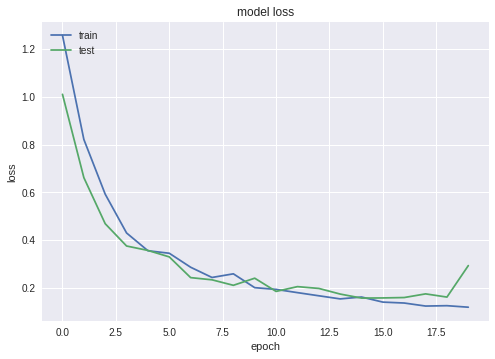

In [0]:
history = model.fit(X_train, y_train, epochs=20, batch_size=50,  verbose=1, validation_split=0.2)
validation_loss = history.history['val_loss'][-1]
validation_accuracy = history.history['val_acc'][-1]
test_score = model.evaluate(x = X_test, y= y_test)

print(f'Validation Loss:{validation_loss}, Validation Accuracy:{validation_accuracy}, Test Accuracy:{test_score[1]} with epochs:{20}')

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
#plt.savefig(os.path.joins(directory, 'Training_curve.png'))
plt.show()
plt.close()


In [0]:
!pip install hpbandster

    100% |████████████████████████████████| 61kB 5.6MB/s 
    100% |████████████████████████████████| 92kB 13.2MB/s 
    100% |████████████████████████████████| 890kB 17.2MB/s 
  Stored in directory: /root/.cache/pip/wheels/9d/57/62/6b00c8011bac96e0c404adc5be4e16964ba4544614240b4e23
  Stored in directory: /root/.cache/pip/wheels/75/83/cb/28dd42bac69c8867d485138030daa83841c7f84afe68b2fdf7
Successfully built hpbandster ConfigSpace


In [0]:

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, BatchNormalization, Activation
from keras import backend as K
from keras import regularizers

import datetime
import pickle

import os
import logging

import ConfigSpace as CS
import ConfigSpace.hyperparameters as CSH
from hpbandster.core.worker import Worker

import hpbandster.core.result as hpres
# import hpbandster.visualization as hpvis
import hpbandster.core.nameserver as hpns
from hpbandster.optimizers import BOHB


class KerasWorker(Worker):
    def __init__(self, **kwargs):
        """
        Initialise class and store training and testing data

        source: source of csv file (excel or nyone)
        """
        super().__init__(**kwargs)
        
        df1 = pd.read_csv("BC_Data1.csv")
        X = pd.DataFrame(data=df1,columns= ['Age', 'Tumor Size','Nodes','KI67','Basal-like Score','Luminal A Score','Luminal B Score', 'HER2-enriched Score',
                                    'Normal Score','ESR1 Score','ERBB2 Score','PGR Score','Proliferation Score','Luminal Score',
                                    'ACTR3B','ANLN','BAG1','BCL2','BLVRA','CCNE1','CDC6','CDH3','CXXC5', 'EGFR' ,'ERBB2', 'ESR1','EXO1', 'FGFR4',
                                    'FOXA1', 'FOXC1', 'GRB7', 'KRT14', 'KRT17','KRT5', 'MAPT','MDM2','MIA','MLPH','MMP11', 'MYBL2', 'MYC', 'NAT1',
                                    'ORC6L', 'PGR', 'PHGDH', 'SFRP1' , 'SLC39A6', 'UBE2T' ,'CDC20' ,'MKI67', 'RRM2','TYMS', 'UBE2C', 'CENPF', 'GPR160',
                                    'KIF2C', 'MELK', 'TMEM45B', 'BIRC5', 'CCNB1','CDCA1','CEP55', 'KNTC2','PTTG1'])
        X['KI67'] = X['KI67'].fillna(0)
        y = pd.DataFrame(data=df1,columns= ['Subtype Prediction'])
        X = np.array(X).astype(np.float64)
        y = np.array(y)
        one = OneHotEncoder() #initiate class
        y = one.fit_transform(y)
        X,y = shuffle(X,y)
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
        X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.1)
        self.X_train, self.X_test, self.X_valid, self.y_train, self.y_test, self.y_valid = X_train, X_test, X_valid, y_train, y_test, y_valid

    def compute(self, config, budget, working_directory, *args, **kwargs):
        """
        Get model with hyperparameters from config generated by get_configspace()
        """

        K.clear_session()  # to reset the network graph for each model

        a = datetime.datetime.now()

        budget = int(budget)
        model = Sequential()
        model.add(Dense(int(config['dense_units']), input_dim=64, kernel_initializer='normal', activation=config['activation']))
        for i in range(0,config['number_of_layers']):
          model.add(Dense(int(config['dense_units']), activation=config['activation']))
        model.add(Dense(5, activation='softmax'))
        
        if config['optimizer'] == 'Nadam':
            optimizer = keras.optimizers.Nadam(config['lr'])
        elif config['optimizer'] == 'SGD':
          
            optimizer = keras.optimizers.SGD(config['lr'], config['sgd_momentum'])
        elif config['optimizer'] == 'adam':
            optimizer = keras.optimizers.adam(config['lr'])
        model.compile(loss=keras.losses.categorical_crossentropy, optimizer=optimizer, metrics=['accuracy'])
        history = model.fit(self.X_train, self.y_train, epochs=budget, batch_size=config['batch_size'],  verbose=1, validation_data=(self.X_valid, self.y_valid))
        testing_score = model.evaluate(self.X_test, self.y_test)
        c = datetime.datetime.now() - a
        
#         print(f'Validation Loss:{history.history['val_loss']} with epochs:{budget}, in :{c} seconds')

        return({
            'loss': history.history['val_loss'][-1],  # Hyperband always minimizes, so we want to minimise the error, error = 1-accuracy
            'info': {'dataset_used': 'Proteomes', 'test_accuracy': testing_score}  # mandatory- can be used in the future to give more information
        })

        
    @staticmethod
    def get_configspace():
        """
        Define all the hyperparameters that need to be optimised and store them in config
        """
        cs = CS.ConfigurationSpace()

        lr = CSH.UniformFloatHyperparameter('lr', lower=1e-6, upper=1e-1, default_value='1e-2', log=True)
        optimizer = CSH.CategoricalHyperparameter('optimizer', ['Nadam', 'SGD','adam'])
        sgd_momentum = CSH.UniformFloatHyperparameter('sgd_momentum', lower=0.0, upper=0.99, default_value=0.9, log=False)
        batch_size = CSH.UniformIntegerHyperparameter('batch_size', lower=2, upper=6, default_value=4)
        cs.add_hyperparameters([lr, optimizer, sgd_momentum, batch_size])
        
        activation = CSH.CategoricalHyperparameter('activation', ['relu', 'tanh'])
        cs.add_hyperparameters([activation])
        number_of_layers = CSH.UniformIntegerHyperparameter('number_of_layers', lower=0, upper=4)
        cs.add_hyperparameters([number_of_layers])
        
        dense_units = CSH.UniformIntegerHyperparameter('dense_units', lower=64 , upper=256 , log=True )
        cs.add_hyperparameters([dense_units])

        cond = CS.EqualsCondition(sgd_momentum, optimizer, 'SGD')
        cs.add_condition(cond)
    
        return cs


/usr/local/lib/python3.6/dist-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [0]:
def run_bohb(exp_name):
    
    run_dir='./'
    result_logger = hpres.json_result_logger(directory=run_dir, overwrite=True)
    # Start a nameserver
    NS = hpns.NameServer(run_id=exp_name, host='127.0.0.1', port=0, working_directory=run_dir)
    ns_host, ns_port = NS.start()

    # Start a localserver
    worker = KerasWorker( run_id=exp_name, host='127.0.0.1', nameserver=ns_host, nameserver_port=ns_port, 
                        timeout=120)
    worker.run(background=True)

    # Initialise optimiser
    bohb = BOHB(configspace=worker.get_configspace(),
                run_id=exp_name,
                host='127.0.0.1',
                nameserver=ns_host, 
                nameserver_port=ns_port,
                result_logger=result_logger,
                min_budget=10, max_budget=20,
                )
    res = bohb.run(n_iterations=20)


    # Store the results
    with open('result.pkl', 'wb') as f:
        pickle.dump(res, f)
    


    # get all runs
    all_runs = res.get_all_runs()

    # get id to configuration mapping as dictionary
    id2conf = res.get_id2config_mapping()

    # get best/incubent run
    best_run = res.get_incumbent_id()
    best_config = id2conf[best_run]['config']
    
    print(f"Best run:{best_config}")

    # Store all run info
    f = open('summary.txt', 'w' )
    f.write(f"{all_runs}")
    f.close()
        # Shutdown
    
    bohb.shutdown(shutdown_workers=True)
    #NS.shutdown()

run_bohb('run_01')

17:30:21 wait_for_workers trying to get the condition
17:30:21 DISPATCHER: started the 'discover_worker' thread
17:30:21 WORKER: Connected to nameserver <Pyro4.core.Proxy at 0x7f76162a4cf8; connected IPv4; for PYRO:Pyro.NameServer@127.0.0.1:45127>
17:30:21 DISPATCHER: started the 'job_runner' thread
17:30:21 WORKER: No dispatcher found. Waiting for one to initiate contact.
17:30:21 WORKER: start listening for jobs
17:30:21 DISPATCHER: Pyro daemon running on 127.0.0.1:37243
17:30:21 DISPATCHER: Starting worker discovery
17:30:21 DISPATCHER: Found 1 potential workers, 0 currently in the pool.
17:30:21 DISPATCHER: discovered new worker, hpbandster.run_run_01.worker.01360c10cc69.143140147540842368
17:30:21 HBMASTER: number of workers changed to 1
17:30:21 Enough workers to start this run!
17:30:21 HBMASTER: starting run at 1553707821.387612
17:30:21 adjust_queue_size: lock accquired
17:30:21 DISPATCHER: jobs to submit = 0, number of idle workers = 1 -> waiting!
17:30:21 HBMASTER: adjusted 

Train on 585 samples, validate on 66 samples
Epoch 1/20
585/585 [==============================] - 1s 1ms/step - loss: 1.2528 - acc: 0.4957 - val_loss: 1.1293 - val_acc: 0.5152
Epoch 2/20
585/585 [==============================] - 0s 791us/step - loss: 0.9404 - acc: 0.6752 - val_loss: 0.9682 - val_acc: 0.6515
Epoch 3/20
585/585 [==============================] - 0s 813us/step - loss: 0.8506 - acc: 0.7179 - val_loss: 0.8840 - val_acc: 0.6667
Epoch 4/20
585/585 [==============================] - 0s 819us/step - loss: 0.7676 - acc: 0.7419 - val_loss: 0.7911 - val_acc: 0.7576
Epoch 5/20
585/585 [==============================] - 0s 774us/step - loss: 0.6947 - acc: 0.7761 - val_loss: 0.7874 - val_acc: 0.6970
Epoch 6/20
585/585 [==============================] - 0s 754us/step - loss: 0.6458 - acc: 0.7983 - val_loss: 0.7259 - val_acc: 0.7121
Epoch 7/20
585/585 [==============================] - 0s 793us/step - loss: 0.6038 - acc: 0.8137 - val_loss: 0.7511 - val_acc: 0.6818
Epoch 8/20
585/585 

17:30:31 WORKER: done with job (0, 0, 0), trying to register it.
17:30:31 WORKER: registered result for job (0, 0, 0) with dispatcher
17:30:31 DISPATCHER: job (0, 0, 0) finished
17:30:31 DISPATCHER: register_result: lock acquired
17:30:31 DISPATCHER: job (0, 0, 0) on hpbandster.run_run_01.worker.01360c10cc69.143140147540842368 finished
17:30:31 job_id: (0, 0, 0)
kwargs: {'config': {'activation': 'tanh', 'batch_size': 5, 'dense_units': 81, 'lr': 0.00010897659937884412, 'number_of_layers': 0, 'optimizer': 'SGD', 'sgd_momentum': 0.8807065622180759}, 'budget': 20.0, 'working_directory': '.'}
result: {'loss': 0.5009130377209547, 'info': {'dataset_used': 'Proteomes', 'test_accuracy': [0.4393298945909629, 0.8282208588957055]}}
exception: None

17:30:31 job_callback for (0, 0, 0) started
17:30:31 DISPATCHER: Trying to submit another job.
17:30:31 DISPATCHER: jobs to submit = 0, number of idle workers = 1 -> waiting!
17:30:31 job_callback for (0, 0, 0) got condition
17:30:31 Only 1 run(s) for b

Train on 585 samples, validate on 66 samples
Epoch 1/20
585/585 [==============================] - 1s 922us/step - loss: 10.8295 - acc: 0.3197 - val_loss: 11.4780 - val_acc: 0.2879
Epoch 2/20
585/585 [==============================] - 0s 639us/step - loss: 10.9934 - acc: 0.3179 - val_loss: 11.4780 - val_acc: 0.2879
Epoch 3/20
585/585 [==============================] - 0s 684us/step - loss: 10.9934 - acc: 0.3179 - val_loss: 11.4780 - val_acc: 0.2879
Epoch 4/20
585/585 [==============================] - 0s 689us/step - loss: 10.9934 - acc: 0.3179 - val_loss: 11.4780 - val_acc: 0.2879
Epoch 5/20
585/585 [==============================] - 0s 641us/step - loss: 10.9934 - acc: 0.3179 - val_loss: 11.4780 - val_acc: 0.2879
Epoch 6/20
585/585 [==============================] - 0s 647us/step - loss: 10.9934 - acc: 0.3179 - val_loss: 11.4780 - val_acc: 0.2879
Epoch 7/20
585/585 [==============================] - 0s 645us/step - loss: 10.9934 - acc: 0.3179 - val_loss: 11.4780 - val_acc: 0.2879
Epo

17:30:39 WORKER: done with job (1, 0, 0), trying to register it.
17:30:39 WORKER: registered result for job (1, 0, 0) with dispatcher
17:30:39 DISPATCHER: job (1, 0, 0) finished
17:30:39 DISPATCHER: register_result: lock acquired
17:30:39 DISPATCHER: job (1, 0, 0) on hpbandster.run_run_01.worker.01360c10cc69.143140147540842368 finished
17:30:39 job_id: (1, 0, 0)
kwargs: {'config': {'activation': 'relu', 'batch_size': 6, 'dense_units': 97, 'lr': 0.0794861031325187, 'number_of_layers': 0, 'optimizer': 'SGD', 'sgd_momentum': 0.15614617271590037}, 'budget': 20.0, 'working_directory': '.'}
result: {'loss': 11.478037574074484, 'info': {'dataset_used': 'Proteomes', 'test_accuracy': [10.580590324167824, 0.34355828220858897]}}
exception: None

17:30:39 job_callback for (1, 0, 0) started
17:30:39 DISPATCHER: Trying to submit another job.
17:30:39 DISPATCHER: jobs to submit = 0, number of idle workers = 1 -> waiting!
17:30:39 job_callback for (1, 0, 0) got condition
17:30:39 Only 2 run(s) for bud

Train on 585 samples, validate on 66 samples
Epoch 1/20
585/585 [==============================] - 1s 2ms/step - loss: 0.8950 - acc: 0.6462 - val_loss: 0.6832 - val_acc: 0.7424
Epoch 2/20
585/585 [==============================] - 1s 2ms/step - loss: 0.5730 - acc: 0.7692 - val_loss: 0.3393 - val_acc: 0.8788
Epoch 3/20
585/585 [==============================] - 1s 2ms/step - loss: 0.6430 - acc: 0.7556 - val_loss: 0.7456 - val_acc: 0.7121
Epoch 4/20
585/585 [==============================] - 1s 2ms/step - loss: 0.5244 - acc: 0.8137 - val_loss: 1.0224 - val_acc: 0.6818
Epoch 5/20
585/585 [==============================] - 1s 2ms/step - loss: 0.5281 - acc: 0.7949 - val_loss: 0.8024 - val_acc: 0.6818
Epoch 6/20
585/585 [==============================] - 1s 2ms/step - loss: 0.4453 - acc: 0.8427 - val_loss: 0.7024 - val_acc: 0.7121
Epoch 7/20
585/585 [==============================] - 1s 2ms/step - loss: 0.5427 - acc: 0.8017 - val_loss: 0.6000 - val_acc: 0.7121
Epoch 8/20
585/585 [===========

17:31:02 WORKER: done with job (2, 0, 0), trying to register it.
17:31:02 WORKER: registered result for job (2, 0, 0) with dispatcher
17:31:02 DISPATCHER: job (2, 0, 0) finished
17:31:02 DISPATCHER: register_result: lock acquired
17:31:02 DISPATCHER: job (2, 0, 0) on hpbandster.run_run_01.worker.01360c10cc69.143140147540842368 finished
17:31:02 job_id: (2, 0, 0)
kwargs: {'config': {'activation': 'tanh', 'batch_size': 3, 'dense_units': 68, 'lr': 0.008591623706615167, 'number_of_layers': 1, 'optimizer': 'Nadam'}, 'budget': 20.0, 'working_directory': '.'}
result: {'loss': 0.6158586383204568, 'info': {'dataset_used': 'Proteomes', 'test_accuracy': [0.7997019429879686, 0.7546012273595377]}}
exception: None

17:31:02 job_callback for (2, 0, 0) started
17:31:02 job_callback for (2, 0, 0) got condition
17:31:02 DISPATCHER: Trying to submit another job.
17:31:02 Only 3 run(s) for budget 20.000000 available, need more than 9 -> can't build model!
17:31:02 HBMASTER: Trying to run another job!
17:3

Train on 585 samples, validate on 66 samples
Epoch 1/20
585/585 [==============================] - 1s 1ms/step - loss: 1.4152 - acc: 0.4957 - val_loss: 1.7169 - val_acc: 0.3636
Epoch 2/20
585/585 [==============================] - 0s 822us/step - loss: 1.1796 - acc: 0.5692 - val_loss: 1.0867 - val_acc: 0.5000
Epoch 3/20
585/585 [==============================] - 0s 809us/step - loss: 1.0404 - acc: 0.6085 - val_loss: 0.8613 - val_acc: 0.5909
Epoch 4/20
585/585 [==============================] - 0s 834us/step - loss: 0.9964 - acc: 0.6137 - val_loss: 2.9417 - val_acc: 0.3182
Epoch 5/20
585/585 [==============================] - 0s 822us/step - loss: 1.0695 - acc: 0.6462 - val_loss: 1.5441 - val_acc: 0.5303
Epoch 6/20
585/585 [==============================] - 0s 820us/step - loss: 1.4195 - acc: 0.4991 - val_loss: 1.4369 - val_acc: 0.3182
Epoch 7/20
585/585 [==============================] - 0s 809us/step - loss: 1.1711 - acc: 0.5778 - val_loss: 1.9599 - val_acc: 0.2727
Epoch 8/20
585/585 

17:31:12 WORKER: done with job (3, 0, 0), trying to register it.
17:31:12 WORKER: registered result for job (3, 0, 0) with dispatcher
17:31:12 DISPATCHER: job (3, 0, 0) finished
17:31:12 DISPATCHER: register_result: lock acquired
17:31:12 DISPATCHER: job (3, 0, 0) on hpbandster.run_run_01.worker.01360c10cc69.143140147540842368 finished
17:31:12 job_id: (3, 0, 0)
kwargs: {'config': {'activation': 'tanh', 'batch_size': 6, 'dense_units': 78, 'lr': 0.03414025604154261, 'number_of_layers': 0, 'optimizer': 'Nadam'}, 'budget': 20.0, 'working_directory': '.'}
result: {'loss': 1.0758239267901941, 'info': {'dataset_used': 'Proteomes', 'test_accuracy': [1.3217051848312098, 0.6441717793239407]}}
exception: None

17:31:12 job_callback for (3, 0, 0) started
17:31:12 DISPATCHER: Trying to submit another job.
17:31:12 DISPATCHER: jobs to submit = 0, number of idle workers = 1 -> waiting!
17:31:12 job_callback for (3, 0, 0) got condition
17:31:12 Only 4 run(s) for budget 20.000000 available, need more 

Train on 585 samples, validate on 66 samples
Epoch 1/20
585/585 [==============================] - 1s 972us/step - loss: 1.5735 - acc: 0.3453 - val_loss: 1.6516 - val_acc: 0.1515
Epoch 2/20
585/585 [==============================] - 0s 698us/step - loss: 1.3188 - acc: 0.4376 - val_loss: 1.2333 - val_acc: 0.5455
Epoch 3/20
585/585 [==============================] - 0s 696us/step - loss: 1.3273 - acc: 0.4513 - val_loss: 1.5776 - val_acc: 0.3788
Epoch 4/20
585/585 [==============================] - 0s 712us/step - loss: 1.2518 - acc: 0.4615 - val_loss: 1.8281 - val_acc: 0.2576
Epoch 5/20
585/585 [==============================] - 0s 676us/step - loss: 1.1830 - acc: 0.5009 - val_loss: 1.3745 - val_acc: 0.4394
Epoch 6/20
585/585 [==============================] - 0s 680us/step - loss: 1.1205 - acc: 0.5179 - val_loss: 0.9982 - val_acc: 0.5303
Epoch 7/20
585/585 [==============================] - 0s 699us/step - loss: 1.0611 - acc: 0.5402 - val_loss: 1.4862 - val_acc: 0.4545
Epoch 8/20
585/58

17:31:21 DISPATCHER: Starting worker discovery
17:31:21 DISPATCHER: Found 1 potential workers, 1 currently in the pool.
17:31:21 DISPATCHER: Finished worker discovery


163/163 [==============================] - 0s 101us/step


17:31:21 WORKER: done with job (4, 0, 0), trying to register it.
17:31:21 WORKER: registered result for job (4, 0, 0) with dispatcher
17:31:21 DISPATCHER: job (4, 0, 0) finished
17:31:21 DISPATCHER: register_result: lock acquired
17:31:21 DISPATCHER: job (4, 0, 0) on hpbandster.run_run_01.worker.01360c10cc69.143140147540842368 finished
17:31:21 job_id: (4, 0, 0)
kwargs: {'config': {'activation': 'tanh', 'batch_size': 6, 'dense_units': 110, 'lr': 0.04425612646055164, 'number_of_layers': 1, 'optimizer': 'SGD', 'sgd_momentum': 0.0033595150632530512}, 'budget': 20.0, 'working_directory': '.'}
result: {'loss': 1.5175600268624045, 'info': {'dataset_used': 'Proteomes', 'test_accuracy': [1.569190060434166, 0.4417177915938793]}}
exception: None

17:31:21 job_callback for (4, 0, 0) started
17:31:21 job_callback for (4, 0, 0) got condition
17:31:21 DISPATCHER: Trying to submit another job.
17:31:21 Only 5 run(s) for budget 20.000000 available, need more than 9 -> can't build model!
17:31:21 HBMAS

Train on 585 samples, validate on 66 samples
Epoch 1/20
585/585 [==============================] - 1s 1ms/step - loss: 1.2563 - acc: 0.4923 - val_loss: 1.1522 - val_acc: 0.4848
Epoch 2/20
585/585 [==============================] - 1s 902us/step - loss: 1.0033 - acc: 0.6239 - val_loss: 0.9680 - val_acc: 0.6970
Epoch 3/20
585/585 [==============================] - 1s 883us/step - loss: 0.8588 - acc: 0.7111 - val_loss: 0.8493 - val_acc: 0.6818
Epoch 4/20
585/585 [==============================] - 1s 914us/step - loss: 0.7505 - acc: 0.7453 - val_loss: 0.7246 - val_acc: 0.7576
Epoch 5/20
585/585 [==============================] - 1s 889us/step - loss: 0.6637 - acc: 0.7846 - val_loss: 0.6445 - val_acc: 0.7576
Epoch 6/20
585/585 [==============================] - 1s 923us/step - loss: 0.5956 - acc: 0.8017 - val_loss: 0.5788 - val_acc: 0.7727
Epoch 7/20
585/585 [==============================] - 1s 900us/step - loss: 0.5377 - acc: 0.8291 - val_loss: 0.5218 - val_acc: 0.7879
Epoch 8/20
585/585 

17:31:33 WORKER: done with job (5, 0, 0), trying to register it.
17:31:33 WORKER: registered result for job (5, 0, 0) with dispatcher
17:31:33 DISPATCHER: job (5, 0, 0) finished
17:31:33 DISPATCHER: register_result: lock acquired
17:31:33 DISPATCHER: job (5, 0, 0) on hpbandster.run_run_01.worker.01360c10cc69.143140147540842368 finished
17:31:33 job_id: (5, 0, 0)
kwargs: {'config': {'activation': 'tanh', 'batch_size': 5, 'dense_units': 233, 'lr': 4.824982802774297e-05, 'number_of_layers': 0, 'optimizer': 'adam'}, 'budget': 20.0, 'working_directory': '.'}
result: {'loss': 0.2987150290247166, 'info': {'dataset_used': 'Proteomes', 'test_accuracy': [0.3562021051630652, 0.8588957055214724]}}
exception: None

17:31:33 job_callback for (5, 0, 0) started
17:31:33 job_callback for (5, 0, 0) got condition
17:31:33 DISPATCHER: Trying to submit another job.
17:31:33 DISPATCHER: jobs to submit = 0, number of idle workers = 1 -> waiting!
17:31:33 Only 6 run(s) for budget 20.000000 available, need mor

Train on 585 samples, validate on 66 samples
Epoch 1/20
585/585 [==============================] - 1s 2ms/step - loss: 1.0403 - acc: 0.6120 - val_loss: 0.7600 - val_acc: 0.7424
Epoch 2/20
585/585 [==============================] - 1s 1ms/step - loss: 0.5705 - acc: 0.8171 - val_loss: 0.4947 - val_acc: 0.8485
Epoch 3/20
585/585 [==============================] - 1s 1ms/step - loss: 0.4002 - acc: 0.8598 - val_loss: 0.4050 - val_acc: 0.8636
Epoch 4/20
585/585 [==============================] - 1s 1ms/step - loss: 0.3297 - acc: 0.8838 - val_loss: 0.3910 - val_acc: 0.8333
Epoch 5/20
585/585 [==============================] - 1s 1ms/step - loss: 0.2831 - acc: 0.9026 - val_loss: 0.2790 - val_acc: 0.9545
Epoch 6/20
585/585 [==============================] - 1s 1ms/step - loss: 0.2238 - acc: 0.9248 - val_loss: 0.4199 - val_acc: 0.8030
Epoch 7/20
585/585 [==============================] - 1s 1ms/step - loss: 0.2112 - acc: 0.9248 - val_loss: 0.2330 - val_acc: 0.9091
Epoch 8/20
585/585 [===========

17:31:50 WORKER: done with job (6, 0, 0), trying to register it.
17:31:50 WORKER: registered result for job (6, 0, 0) with dispatcher
17:31:50 DISPATCHER: job (6, 0, 0) finished
17:31:50 DISPATCHER: register_result: lock acquired
17:31:50 DISPATCHER: job (6, 0, 0) on hpbandster.run_run_01.worker.01360c10cc69.143140147540842368 finished
17:31:50 job_id: (6, 0, 0)
kwargs: {'config': {'activation': 'tanh', 'batch_size': 4, 'dense_units': 78, 'lr': 0.0002389370532678974, 'number_of_layers': 2, 'optimizer': 'adam'}, 'budget': 20.0, 'working_directory': '.'}
result: {'loss': 0.16737410759158206, 'info': {'dataset_used': 'Proteomes', 'test_accuracy': [0.34196583105056927, 0.8895705521472392]}}
exception: None

17:31:50 job_callback for (6, 0, 0) started
17:31:50 DISPATCHER: Trying to submit another job.
17:31:50 job_callback for (6, 0, 0) got condition
17:31:50 DISPATCHER: jobs to submit = 0, number of idle workers = 1 -> waiting!
17:31:50 Only 7 run(s) for budget 20.000000 available, need mo

Train on 585 samples, validate on 66 samples
Epoch 1/20
585/585 [==============================] - 2s 4ms/step - loss: 1.5092 - acc: 0.3214 - val_loss: 1.3984 - val_acc: 0.3333
Epoch 2/20
585/585 [==============================] - 2s 3ms/step - loss: 1.2234 - acc: 0.4735 - val_loss: 1.2334 - val_acc: 0.4394
Epoch 3/20
585/585 [==============================] - 2s 3ms/step - loss: 1.0700 - acc: 0.5778 - val_loss: 1.0796 - val_acc: 0.5606
Epoch 4/20
585/585 [==============================] - 2s 3ms/step - loss: 0.9294 - acc: 0.6667 - val_loss: 0.9521 - val_acc: 0.6061
Epoch 5/20
585/585 [==============================] - 2s 3ms/step - loss: 0.8163 - acc: 0.7060 - val_loss: 0.8304 - val_acc: 0.7121
Epoch 6/20
585/585 [==============================] - 2s 3ms/step - loss: 0.7262 - acc: 0.7556 - val_loss: 0.7590 - val_acc: 0.6667
Epoch 7/20
585/585 [==============================] - 2s 3ms/step - loss: 0.6557 - acc: 0.7915 - val_loss: 0.6739 - val_acc: 0.8030
Epoch 8/20
585/585 [===========

17:32:21 DISPATCHER: Starting worker discovery
17:32:21 DISPATCHER: Found 1 potential workers, 1 currently in the pool.
17:32:21 DISPATCHER: Finished worker discovery


585/585 [==============================] - 2s 3ms/step - loss: 0.3195 - acc: 0.9077 - val_loss: 0.3477 - val_acc: 0.8939
Epoch 19/20
585/585 [==============================] - 2s 3ms/step - loss: 0.3045 - acc: 0.9111 - val_loss: 0.3421 - val_acc: 0.9091
Epoch 20/20
163/163 [==============================] - 0s 97us/step


17:32:26 WORKER: done with job (7, 0, 0), trying to register it.
17:32:26 DISPATCHER: job (7, 0, 0) finished
17:32:26 WORKER: registered result for job (7, 0, 0) with dispatcher
17:32:26 DISPATCHER: register_result: lock acquired
17:32:26 DISPATCHER: job (7, 0, 0) on hpbandster.run_run_01.worker.01360c10cc69.143140147540842368 finished
17:32:26 job_id: (7, 0, 0)
kwargs: {'config': {'activation': 'tanh', 'batch_size': 2, 'dense_units': 82, 'lr': 2.4549909280703935e-05, 'number_of_layers': 2, 'optimizer': 'Nadam'}, 'budget': 20.0, 'working_directory': '.'}
result: {'loss': 0.3299054452077006, 'info': {'dataset_used': 'Proteomes', 'test_accuracy': [0.3724433759604495, 0.8773006134969326]}}
exception: None

17:32:26 job_callback for (7, 0, 0) started
17:32:26 DISPATCHER: Trying to submit another job.
17:32:26 DISPATCHER: jobs to submit = 0, number of idle workers = 1 -> waiting!
17:32:26 job_callback for (7, 0, 0) got condition
17:32:26 HBMASTER: Trying to run another job!
17:32:26 job_cal

Train on 585 samples, validate on 66 samples
Epoch 1/20
585/585 [==============================] - 1s 2ms/step - loss: 1.1971 - acc: 0.5641 - val_loss: 1.1004 - val_acc: 0.6212
Epoch 2/20
585/585 [==============================] - 1s 2ms/step - loss: 0.7502 - acc: 0.7402 - val_loss: 0.7700 - val_acc: 0.6515
Epoch 3/20
585/585 [==============================] - 1s 1ms/step - loss: 0.5668 - acc: 0.8017 - val_loss: 0.7758 - val_acc: 0.7273
Epoch 4/20
585/585 [==============================] - 1s 2ms/step - loss: 0.5780 - acc: 0.8068 - val_loss: 0.4185 - val_acc: 0.8485
Epoch 5/20
585/585 [==============================] - 1s 2ms/step - loss: 0.4212 - acc: 0.8684 - val_loss: 0.4117 - val_acc: 0.8788
Epoch 6/20
585/585 [==============================] - 1s 2ms/step - loss: 0.4617 - acc: 0.8530 - val_loss: 0.7854 - val_acc: 0.5758
Epoch 7/20
585/585 [==============================] - 1s 2ms/step - loss: 0.3918 - acc: 0.8667 - val_loss: 0.5092 - val_acc: 0.8788
Epoch 8/20
585/585 [===========

17:32:46 WORKER: done with job (8, 0, 0), trying to register it.
17:32:46 WORKER: registered result for job (8, 0, 0) with dispatcher
17:32:46 DISPATCHER: job (8, 0, 0) finished
17:32:46 DISPATCHER: register_result: lock acquired
17:32:46 DISPATCHER: job (8, 0, 0) on hpbandster.run_run_01.worker.01360c10cc69.143140147540842368 finished
17:32:46 job_id: (8, 0, 0)
kwargs: {'config': {'activation': 'relu', 'batch_size': 5, 'dense_units': 158, 'lr': 0.004756138648703685, 'number_of_layers': 4, 'optimizer': 'Nadam'}, 'budget': 20.0, 'working_directory': '.'}
result: {'loss': 0.6792212379249659, 'info': {'dataset_used': 'Proteomes', 'test_accuracy': [0.7342855484207715, 0.6748466261325439]}}
exception: None

17:32:46 job_callback for (8, 0, 0) started
17:32:46 DISPATCHER: Trying to submit another job.
17:32:46 DISPATCHER: jobs to submit = 0, number of idle workers = 1 -> waiting!
17:32:46 job_callback for (8, 0, 0) got condition
17:32:46 HBMASTER: Trying to run another job!
17:32:46 job_call

Train on 585 samples, validate on 66 samples
Epoch 1/20
585/585 [==============================] - 1s 2ms/step - loss: 1.4841 - acc: 0.2462 - val_loss: 1.4923 - val_acc: 0.2879
Epoch 2/20
585/585 [==============================] - 1s 1ms/step - loss: 1.4140 - acc: 0.3385 - val_loss: 1.4559 - val_acc: 0.3030
Epoch 3/20
585/585 [==============================] - 1s 1ms/step - loss: 1.3658 - acc: 0.3795 - val_loss: 1.4271 - val_acc: 0.3182
Epoch 4/20
585/585 [==============================] - 1s 1ms/step - loss: 1.3288 - acc: 0.4154 - val_loss: 1.4034 - val_acc: 0.3333
Epoch 5/20
585/585 [==============================] - 1s 1ms/step - loss: 1.2986 - acc: 0.4530 - val_loss: 1.3808 - val_acc: 0.3333
Epoch 6/20
585/585 [==============================] - 1s 1ms/step - loss: 1.2715 - acc: 0.4701 - val_loss: 1.3592 - val_acc: 0.3636
Epoch 7/20
585/585 [==============================] - 1s 1ms/step - loss: 1.2471 - acc: 0.5231 - val_loss: 1.3373 - val_acc: 0.3788
Epoch 8/20
585/585 [===========

17:32:59 WORKER: done with job (9, 0, 0), trying to register it.
17:32:59 WORKER: registered result for job (9, 0, 0) with dispatcher
17:32:59 DISPATCHER: job (9, 0, 0) finished
17:32:59 DISPATCHER: register_result: lock acquired
17:32:59 DISPATCHER: job (9, 0, 0) on hpbandster.run_run_01.worker.01360c10cc69.143140147540842368 finished
17:32:59 job_id: (9, 0, 0)
kwargs: {'config': {'activation': 'tanh', 'batch_size': 5, 'dense_units': 74, 'lr': 8.025981441119337e-06, 'number_of_layers': 2, 'optimizer': 'adam'}, 'budget': 20.0, 'working_directory': '.'}
result: {'loss': 1.0690252582232158, 'info': {'dataset_used': 'Proteomes', 'test_accuracy': [0.9464898160630209, 0.6871165646000142]}}
exception: None

17:32:59 job_callback for (9, 0, 0) started
17:32:59 DISPATCHER: Trying to submit another job.
17:32:59 DISPATCHER: jobs to submit = 0, number of idle workers = 1 -> waiting!
17:32:59 job_callback for (9, 0, 0) got condition
17:32:59 HBMASTER: Trying to run another job!
17:32:59 job_callb

Train on 585 samples, validate on 66 samples
Epoch 1/20
585/585 [==============================] - 1s 2ms/step - loss: 1.1111 - acc: 0.5470 - val_loss: 1.4180 - val_acc: 0.4394
Epoch 2/20
585/585 [==============================] - 1s 1ms/step - loss: 0.7518 - acc: 0.7060 - val_loss: 0.9675 - val_acc: 0.5909
Epoch 3/20
585/585 [==============================] - 1s 1ms/step - loss: 0.6175 - acc: 0.7624 - val_loss: 2.2627 - val_acc: 0.3030
Epoch 4/20
585/585 [==============================] - 1s 1ms/step - loss: 0.6529 - acc: 0.7402 - val_loss: 0.5949 - val_acc: 0.7273
Epoch 5/20
585/585 [==============================] - 1s 1ms/step - loss: 0.5323 - acc: 0.8034 - val_loss: 0.7605 - val_acc: 0.6667
Epoch 6/20
585/585 [==============================] - 1s 1ms/step - loss: 0.5003 - acc: 0.7966 - val_loss: 0.5687 - val_acc: 0.7727
Epoch 7/20
585/585 [==============================] - 1s 1ms/step - loss: 0.4834 - acc: 0.7915 - val_loss: 0.4085 - val_acc: 0.8030
Epoch 8/20
585/585 [===========

17:33:14 WORKER: done with job (10, 0, 0), trying to register it.
17:33:14 WORKER: registered result for job (10, 0, 0) with dispatcher
17:33:14 DISPATCHER: job (10, 0, 0) finished
17:33:14 DISPATCHER: register_result: lock acquired
17:33:14 DISPATCHER: job (10, 0, 0) on hpbandster.run_run_01.worker.01360c10cc69.143140147540842368 finished
17:33:14 job_id: (10, 0, 0)
kwargs: {'config': {'activation': 'tanh', 'batch_size': 4, 'dense_units': 109, 'lr': 0.00586244567127264, 'number_of_layers': 3, 'optimizer': 'SGD', 'sgd_momentum': 0.1280186115821687}, 'budget': 20.0, 'working_directory': '.'}
result: {'loss': 0.48800100363565213, 'info': {'dataset_used': 'Proteomes', 'test_accuracy': [0.4925865807050576, 0.7852760736196319]}}
exception: None

17:33:14 job_callback for (10, 0, 0) started
17:33:14 DISPATCHER: Trying to submit another job.
17:33:14 DISPATCHER: jobs to submit = 0, number of idle workers = 1 -> waiting!
17:33:14 job_callback for (10, 0, 0) got condition
17:33:14 HBMASTER: Try

Train on 585 samples, validate on 66 samples
Epoch 1/20
585/585 [==============================] - 1s 2ms/step - loss: 0.7727 - acc: 0.7333 - val_loss: 0.4540 - val_acc: 0.7727
Epoch 2/20
585/585 [==============================] - 1s 2ms/step - loss: 0.3715 - acc: 0.8650 - val_loss: 0.5203 - val_acc: 0.7576
Epoch 3/20
585/585 [==============================] - 1s 2ms/step - loss: 0.2599 - acc: 0.9077 - val_loss: 0.3369 - val_acc: 0.8788
Epoch 4/20
585/585 [==============================] - 1s 2ms/step - loss: 0.2357 - acc: 0.9094 - val_loss: 0.3085 - val_acc: 0.8485
Epoch 5/20
585/585 [==============================] - 1s 2ms/step - loss: 0.2165 - acc: 0.9060 - val_loss: 0.4287 - val_acc: 0.7879
Epoch 6/20
516/585 [=========================>....] - ETA: 0s - loss: 0.1804 - acc: 0.9244

17:33:21 DISPATCHER: Starting worker discovery


546/585 [===========================>..] - ETA: 0s - loss: 0.1782 - acc: 0.9267

17:33:21 DISPATCHER: Found 1 potential workers, 1 currently in the pool.
17:33:21 DISPATCHER: Finished worker discovery


585/585 [==============================] - 1s 2ms/step - loss: 0.1788 - acc: 0.9282 - val_loss: 0.4348 - val_acc: 0.7879
Epoch 7/20
585/585 [==============================] - 1s 2ms/step - loss: 0.1564 - acc: 0.9436 - val_loss: 0.3631 - val_acc: 0.8788
Epoch 8/20
585/585 [==============================] - 1s 2ms/step - loss: 0.1653 - acc: 0.9385 - val_loss: 0.3507 - val_acc: 0.8636
Epoch 9/20
585/585 [==============================] - 1s 2ms/step - loss: 0.1343 - acc: 0.9470 - val_loss: 0.3358 - val_acc: 0.8788
Epoch 10/20
585/585 [==============================] - 1s 2ms/step - loss: 0.1496 - acc: 0.9419 - val_loss: 0.2852 - val_acc: 0.8788
Epoch 11/20
585/585 [==============================] - 1s 2ms/step - loss: 0.1145 - acc: 0.9504 - val_loss: 0.2661 - val_acc: 0.8939
Epoch 12/20
585/585 [==============================] - 1s 2ms/step - loss: 0.1149 - acc: 0.9521 - val_loss: 0.2264 - val_acc: 0.9091
Epoch 13/20
585/585 [==============================] - 1s 2ms/step - loss: 0.1005 - 

17:33:36 WORKER: done with job (11, 0, 0), trying to register it.
17:33:36 WORKER: registered result for job (11, 0, 0) with dispatcher
17:33:36 DISPATCHER: job (11, 0, 0) finished
17:33:36 DISPATCHER: register_result: lock acquired
17:33:36 DISPATCHER: job (11, 0, 0) on hpbandster.run_run_01.worker.01360c10cc69.143140147540842368 finished
17:33:36 job_id: (11, 0, 0)
kwargs: {'config': {'activation': 'relu', 'batch_size': 3, 'dense_units': 118, 'lr': 0.0006453853848492256, 'number_of_layers': 1, 'optimizer': 'Nadam'}, 'budget': 20.0, 'working_directory': '.'}
result: {'loss': 0.3050251070023726, 'info': {'dataset_used': 'Proteomes', 'test_accuracy': [0.3814021332012318, 0.9079754601226994]}}
exception: None

17:33:36 job_callback for (11, 0, 0) started
17:33:36 DISPATCHER: Trying to submit another job.
17:33:36 DISPATCHER: jobs to submit = 0, number of idle workers = 1 -> waiting!
17:33:36 job_callback for (11, 0, 0) got condition
17:33:36 HBMASTER: Trying to run another job!
17:33:36 

Train on 585 samples, validate on 66 samples
Epoch 1/20
585/585 [==============================] - 1s 2ms/step - loss: 1.6723 - acc: 0.2667 - val_loss: 1.6081 - val_acc: 0.2727
Epoch 2/20
585/585 [==============================] - 1s 2ms/step - loss: 1.5513 - acc: 0.2496 - val_loss: 1.5377 - val_acc: 0.2879
Epoch 3/20
585/585 [==============================] - 1s 2ms/step - loss: 1.4780 - acc: 0.2547 - val_loss: 1.4949 - val_acc: 0.3030
Epoch 4/20
585/585 [==============================] - 1s 2ms/step - loss: 1.4282 - acc: 0.2718 - val_loss: 1.4638 - val_acc: 0.3182
Epoch 5/20
585/585 [==============================] - 1s 2ms/step - loss: 1.3905 - acc: 0.3231 - val_loss: 1.4378 - val_acc: 0.3485
Epoch 6/20
585/585 [==============================] - 1s 2ms/step - loss: 1.3596 - acc: 0.3726 - val_loss: 1.4150 - val_acc: 0.3939
Epoch 7/20
585/585 [==============================] - 1s 2ms/step - loss: 1.3333 - acc: 0.3966 - val_loss: 1.3945 - val_acc: 0.3788
Epoch 8/20
585/585 [===========

17:34:00 WORKER: done with job (12, 0, 0), trying to register it.
17:34:00 WORKER: registered result for job (12, 0, 0) with dispatcher
17:34:00 DISPATCHER: job (12, 0, 0) finished
17:34:00 DISPATCHER: register_result: lock acquired
17:34:00 DISPATCHER: job (12, 0, 0) on hpbandster.run_run_01.worker.01360c10cc69.143140147540842368 finished
17:34:00 job_id: (12, 0, 0)
kwargs: {'config': {'activation': 'tanh', 'batch_size': 2, 'dense_units': 223, 'lr': 6.904581065345013e-06, 'number_of_layers': 1, 'optimizer': 'SGD', 'sgd_momentum': 0.5364103893161447}, 'budget': 20.0, 'working_directory': '.'}
result: {'loss': 1.2250547824483928, 'info': {'dataset_used': 'Proteomes', 'test_accuracy': [1.1073873613509664, 0.5889570553975603]}}
exception: None

17:34:00 job_callback for (12, 0, 0) started
17:34:00 DISPATCHER: Trying to submit another job.
17:34:00 DISPATCHER: jobs to submit = 0, number of idle workers = 1 -> waiting!
17:34:00 job_callback for (12, 0, 0) got condition
17:34:00 HBMASTER: Tr

Train on 585 samples, validate on 66 samples
Epoch 1/20
585/585 [==============================] - 2s 3ms/step - loss: 1.0216 - acc: 0.6068 - val_loss: 0.7015 - val_acc: 0.7576
Epoch 2/20
585/585 [==============================] - 1s 2ms/step - loss: 0.5596 - acc: 0.7556 - val_loss: 0.4497 - val_acc: 0.8636
Epoch 3/20
585/585 [==============================] - 1s 2ms/step - loss: 0.3737 - acc: 0.8462 - val_loss: 0.4898 - val_acc: 0.8182
Epoch 4/20
585/585 [==============================] - 1s 2ms/step - loss: 0.3346 - acc: 0.8547 - val_loss: 0.3757 - val_acc: 0.8333
Epoch 5/20
585/585 [==============================] - 1s 2ms/step - loss: 0.2615 - acc: 0.8906 - val_loss: 0.2924 - val_acc: 0.9091
Epoch 6/20
585/585 [==============================] - 1s 2ms/step - loss: 0.2254 - acc: 0.8991 - val_loss: 0.2936 - val_acc: 0.8788
Epoch 7/20
585/585 [==============================] - 1s 2ms/step - loss: 0.1849 - acc: 0.9248 - val_loss: 0.4136 - val_acc: 0.8333
Epoch 8/20
585/585 [===========

17:34:21 DISPATCHER: Starting worker discovery
17:34:21 DISPATCHER: Found 1 potential workers, 1 currently in the pool.
17:34:21 DISPATCHER: Finished worker discovery


585/585 [==============================] - 1s 2ms/step - loss: 0.1033 - acc: 0.9658 - val_loss: 0.2425 - val_acc: 0.8939
Epoch 17/20
585/585 [==============================] - 1s 2ms/step - loss: 0.0747 - acc: 0.9778 - val_loss: 0.4268 - val_acc: 0.9091
Epoch 18/20
585/585 [==============================] - 1s 2ms/step - loss: 0.0976 - acc: 0.9692 - val_loss: 0.2359 - val_acc: 0.8939
Epoch 19/20
585/585 [==============================] - 1s 2ms/step - loss: 0.0832 - acc: 0.9761 - val_loss: 1.3906 - val_acc: 0.7727
Epoch 20/20
163/163 [==============================] - 0s 101us/step


17:34:27 WORKER: done with job (13, 0, 0), trying to register it.
17:34:27 WORKER: registered result for job (13, 0, 0) with dispatcher
17:34:27 DISPATCHER: job (13, 0, 0) finished
17:34:27 DISPATCHER: register_result: lock acquired
17:34:27 DISPATCHER: job (13, 0, 0) on hpbandster.run_run_01.worker.01360c10cc69.143140147540842368 finished
17:34:27 job_id: (13, 0, 0)
kwargs: {'config': {'activation': 'relu', 'batch_size': 3, 'dense_units': 114, 'lr': 0.00019062182011928854, 'number_of_layers': 4, 'optimizer': 'adam'}, 'budget': 20.0, 'working_directory': '.'}
result: {'loss': 0.247691522366784, 'info': {'dataset_used': 'Proteomes', 'test_accuracy': [0.33450665168087085, 0.901840490797546]}}
exception: None

17:34:27 job_callback for (13, 0, 0) started
17:34:27 DISPATCHER: Trying to submit another job.
17:34:27 job_callback for (13, 0, 0) got condition
17:34:27 DISPATCHER: jobs to submit = 0, number of idle workers = 1 -> waiting!
17:34:27 HBMASTER: Trying to run another job!
17:34:27 j

Train on 585 samples, validate on 66 samples
Epoch 1/20
585/585 [==============================] - 1s 2ms/step - loss: 0.7915 - acc: 0.6838 - val_loss: 0.6199 - val_acc: 0.6970
Epoch 2/20
585/585 [==============================] - 1s 2ms/step - loss: 0.4047 - acc: 0.8650 - val_loss: 0.5020 - val_acc: 0.7576
Epoch 3/20
585/585 [==============================] - 1s 2ms/step - loss: 0.3007 - acc: 0.8991 - val_loss: 0.3115 - val_acc: 0.8788
Epoch 4/20
585/585 [==============================] - 1s 2ms/step - loss: 0.2459 - acc: 0.9179 - val_loss: 0.2948 - val_acc: 0.8939
Epoch 5/20
585/585 [==============================] - 1s 2ms/step - loss: 0.2110 - acc: 0.9299 - val_loss: 0.2649 - val_acc: 0.9091
Epoch 6/20
585/585 [==============================] - 1s 2ms/step - loss: 0.1779 - acc: 0.9453 - val_loss: 0.2054 - val_acc: 0.9242
Epoch 7/20
585/585 [==============================] - 1s 2ms/step - loss: 0.1612 - acc: 0.9453 - val_loss: 0.1936 - val_acc: 0.9394
Epoch 8/20
585/585 [===========

17:34:46 WORKER: done with job (14, 0, 0), trying to register it.
17:34:46 WORKER: registered result for job (14, 0, 0) with dispatcher
17:34:46 DISPATCHER: job (14, 0, 0) finished
17:34:46 DISPATCHER: register_result: lock acquired
17:34:46 DISPATCHER: job (14, 0, 0) on hpbandster.run_run_01.worker.01360c10cc69.143140147540842368 finished
17:34:46 job_id: (14, 0, 0)
kwargs: {'config': {'activation': 'tanh', 'batch_size': 3, 'dense_units': 127, 'lr': 0.0006462647167267841, 'number_of_layers': 0, 'optimizer': 'Nadam'}, 'budget': 20.0, 'working_directory': '.'}
result: {'loss': 0.24898229773944794, 'info': {'dataset_used': 'Proteomes', 'test_accuracy': [0.31712682457480784, 0.8773006134969326]}}
exception: None

17:34:46 job_callback for (14, 0, 0) started
17:34:46 DISPATCHER: Trying to submit another job.
17:34:46 DISPATCHER: jobs to submit = 0, number of idle workers = 1 -> waiting!
17:34:46 job_callback for (14, 0, 0) got condition
17:34:46 HBMASTER: Trying to run another job!
17:34:4

Train on 585 samples, validate on 66 samples
Epoch 1/20
585/585 [==============================] - 1s 2ms/step - loss: 3.9293 - acc: 0.2171 - val_loss: 3.4980 - val_acc: 0.2576
Epoch 2/20
585/585 [==============================] - 1s 1ms/step - loss: 3.7839 - acc: 0.2171 - val_loss: 3.3680 - val_acc: 0.2576
Epoch 3/20
585/585 [==============================] - 1s 1ms/step - loss: 3.6471 - acc: 0.2188 - val_loss: 3.2438 - val_acc: 0.2576
Epoch 4/20
585/585 [==============================] - 1s 1ms/step - loss: 3.5157 - acc: 0.2239 - val_loss: 3.1257 - val_acc: 0.2576
Epoch 5/20
585/585 [==============================] - 1s 1ms/step - loss: 3.3927 - acc: 0.2274 - val_loss: 3.0155 - val_acc: 0.2576
Epoch 6/20
585/585 [==============================] - 1s 1ms/step - loss: 3.2778 - acc: 0.2325 - val_loss: 2.9128 - val_acc: 0.2576
Epoch 7/20
585/585 [==============================] - 1s 1ms/step - loss: 3.1695 - acc: 0.2393 - val_loss: 2.8160 - val_acc: 0.2576
Epoch 8/20
585/585 [===========

17:35:01 WORKER: done with job (15, 0, 0), trying to register it.
17:35:01 WORKER: registered result for job (15, 0, 0) with dispatcher
17:35:01 DISPATCHER: job (15, 0, 0) finished
17:35:01 DISPATCHER: register_result: lock acquired
17:35:01 DISPATCHER: job (15, 0, 0) on hpbandster.run_run_01.worker.01360c10cc69.143140147540842368 finished
17:35:01 job_id: (15, 0, 0)
kwargs: {'config': {'activation': 'relu', 'batch_size': 4, 'dense_units': 78, 'lr': 1.1972369887934813e-06, 'number_of_layers': 0, 'optimizer': 'Nadam'}, 'budget': 20.0, 'working_directory': '.'}
result: {'loss': 2.01423920284618, 'info': {'dataset_used': 'Proteomes', 'test_accuracy': [2.185045509981963, 0.34969325171657867]}}
exception: None

17:35:01 job_callback for (15, 0, 0) started
17:35:01 DISPATCHER: Trying to submit another job.
17:35:01 DISPATCHER: jobs to submit = 0, number of idle workers = 1 -> waiting!
17:35:01 job_callback for (15, 0, 0) got condition
17:35:01 done building a new model for budget 20.000000 b

Train on 585 samples, validate on 66 samples
Epoch 1/20
585/585 [==============================] - 2s 3ms/step - loss: 1.3563 - acc: 0.4205 - val_loss: 1.2985 - val_acc: 0.4242
Epoch 2/20
585/585 [==============================] - 1s 2ms/step - loss: 1.1679 - acc: 0.5607 - val_loss: 1.1928 - val_acc: 0.4545
Epoch 3/20
585/585 [==============================] - 1s 2ms/step - loss: 1.0582 - acc: 0.6120 - val_loss: 1.0717 - val_acc: 0.6061
Epoch 4/20
585/585 [==============================] - 1s 2ms/step - loss: 0.9649 - acc: 0.6701 - val_loss: 0.9767 - val_acc: 0.6515
Epoch 5/20
585/585 [==============================] - 1s 2ms/step - loss: 0.8860 - acc: 0.7026 - val_loss: 0.9102 - val_acc: 0.6212
Epoch 6/20
585/585 [==============================] - 1s 2ms/step - loss: 0.8156 - acc: 0.7350 - val_loss: 0.8547 - val_acc: 0.5909
Epoch 7/20
585/585 [==============================] - 1s 2ms/step - loss: 0.7547 - acc: 0.7470 - val_loss: 0.8038 - val_acc: 0.6364
Epoch 8/20
585/585 [===========

17:35:21 DISPATCHER: Starting worker discovery
17:35:21 DISPATCHER: Found 1 potential workers, 1 currently in the pool.
17:35:21 DISPATCHER: Finished worker discovery


585/585 [==============================] - 1s 2ms/step - loss: 0.4960 - acc: 0.8393 - val_loss: 0.5846 - val_acc: 0.7424
Epoch 15/20
585/585 [==============================] - 1s 2ms/step - loss: 0.4753 - acc: 0.8410 - val_loss: 0.5388 - val_acc: 0.7879
Epoch 16/20
585/585 [==============================] - 1s 2ms/step - loss: 0.4522 - acc: 0.8410 - val_loss: 0.5090 - val_acc: 0.7879
Epoch 17/20
585/585 [==============================] - 1s 2ms/step - loss: 0.4345 - acc: 0.8444 - val_loss: 0.5219 - val_acc: 0.8333
Epoch 18/20
585/585 [==============================] - 1s 2ms/step - loss: 0.4178 - acc: 0.8701 - val_loss: 0.4820 - val_acc: 0.8182
Epoch 19/20
585/585 [==============================] - 1s 2ms/step - loss: 0.4038 - acc: 0.8632 - val_loss: 0.4861 - val_acc: 0.8182
Epoch 20/20
163/163 [==============================] - 0s 106us/step


17:35:30 WORKER: done with job (16, 0, 0), trying to register it.
17:35:30 WORKER: registered result for job (16, 0, 0) with dispatcher
17:35:30 DISPATCHER: job (16, 0, 0) finished
17:35:30 DISPATCHER: register_result: lock acquired
17:35:30 DISPATCHER: job (16, 0, 0) on hpbandster.run_run_01.worker.01360c10cc69.143140147540842368 finished
17:35:30 job_id: (16, 0, 0)
kwargs: {'config': {'activation': 'tanh', 'batch_size': 2, 'dense_units': 202, 'lr': 0.0002248400689826989, 'number_of_layers': 4, 'optimizer': 'SGD', 'sgd_momentum': 0.012440955669980673}, 'budget': 20.0, 'working_directory': '.'}
result: {'loss': 0.4600763686678626, 'info': {'dataset_used': 'Proteomes', 'test_accuracy': [0.46189846125848455, 0.8098159509202454]}}
exception: None

17:35:30 job_callback for (16, 0, 0) started
17:35:30 DISPATCHER: Trying to submit another job.
17:35:30 DISPATCHER: jobs to submit = 0, number of idle workers = 1 -> waiting!
17:35:30 job_callback for (16, 0, 0) got condition
17:35:30 done buil

Train on 585 samples, validate on 66 samples
Epoch 1/20
585/585 [==============================] - 2s 3ms/step - loss: 1.1257 - acc: 0.5556 - val_loss: 0.9582 - val_acc: 0.5909
Epoch 2/20
585/585 [==============================] - 2s 3ms/step - loss: 0.6863 - acc: 0.7538 - val_loss: 0.6252 - val_acc: 0.7273
Epoch 3/20
585/585 [==============================] - 2s 3ms/step - loss: 0.4714 - acc: 0.8205 - val_loss: 0.5574 - val_acc: 0.7424
Epoch 4/20
585/585 [==============================] - 2s 3ms/step - loss: 0.3554 - acc: 0.8821 - val_loss: 0.4692 - val_acc: 0.7727
Epoch 5/20
585/585 [==============================] - 2s 3ms/step - loss: 0.2969 - acc: 0.8940 - val_loss: 0.4779 - val_acc: 0.7879
Epoch 6/20
585/585 [==============================] - 2s 3ms/step - loss: 0.2548 - acc: 0.9197 - val_loss: 0.3818 - val_acc: 0.8485
Epoch 7/20
585/585 [==============================] - 2s 3ms/step - loss: 0.2337 - acc: 0.9128 - val_loss: 0.2684 - val_acc: 0.8939
Epoch 8/20
585/585 [===========

17:36:05 WORKER: done with job (17, 0, 0), trying to register it.
17:36:05 WORKER: registered result for job (17, 0, 0) with dispatcher
17:36:05 DISPATCHER: job (17, 0, 0) finished
17:36:05 DISPATCHER: register_result: lock acquired
17:36:05 DISPATCHER: job (17, 0, 0) on hpbandster.run_run_01.worker.01360c10cc69.143140147540842368 finished
17:36:05 job_id: (17, 0, 0)
kwargs: {'config': {'activation': 'relu', 'batch_size': 2, 'dense_units': 132, 'lr': 9.111874308430073e-05, 'number_of_layers': 3, 'optimizer': 'adam'}, 'budget': 20.0, 'working_directory': '.'}
result: {'loss': 0.12385970767916826, 'info': {'dataset_used': 'Proteomes', 'test_accuracy': [0.4015095918182215, 0.8711656441717791]}}
exception: None

17:36:05 job_callback for (17, 0, 0) started
17:36:05 DISPATCHER: Trying to submit another job.
17:36:05 job_callback for (17, 0, 0) got condition
17:36:05 DISPATCHER: jobs to submit = 0, number of idle workers = 1 -> waiting!
17:36:05 done building a new model for budget 20.000000

Train on 585 samples, validate on 66 samples
Epoch 1/20
585/585 [==============================] - 1s 1ms/step - loss: 1.4482 - acc: 0.4274 - val_loss: 1.6248 - val_acc: 0.3333
Epoch 2/20
585/585 [==============================] - 1s 901us/step - loss: 1.1851 - acc: 0.5573 - val_loss: 1.3494 - val_acc: 0.5000
Epoch 3/20
585/585 [==============================] - 1s 927us/step - loss: 1.0663 - acc: 0.6085 - val_loss: 1.2085 - val_acc: 0.5303
Epoch 4/20
585/585 [==============================] - 1s 909us/step - loss: 0.9683 - acc: 0.6581 - val_loss: 1.1217 - val_acc: 0.5455
Epoch 5/20
585/585 [==============================] - 1s 931us/step - loss: 0.8998 - acc: 0.6615 - val_loss: 1.0420 - val_acc: 0.6667
Epoch 6/20
585/585 [==============================] - 1s 909us/step - loss: 0.8464 - acc: 0.6957 - val_loss: 0.9911 - val_acc: 0.6364
Epoch 7/20
585/585 [==============================] - 1s 903us/step - loss: 0.7981 - acc: 0.7248 - val_loss: 0.9546 - val_acc: 0.6212
Epoch 8/20
585/585 

17:36:17 WORKER: done with job (18, 0, 0), trying to register it.
17:36:17 WORKER: registered result for job (18, 0, 0) with dispatcher
17:36:17 DISPATCHER: job (18, 0, 0) finished
17:36:17 DISPATCHER: register_result: lock acquired
17:36:17 DISPATCHER: job (18, 0, 0) on hpbandster.run_run_01.worker.01360c10cc69.143140147540842368 finished
17:36:17 job_id: (18, 0, 0)
kwargs: {'config': {'activation': 'relu', 'batch_size': 4, 'dense_units': 212, 'lr': 0.00015825655090614705, 'number_of_layers': 0, 'optimizer': 'SGD', 'sgd_momentum': 0.012432148240449982}, 'budget': 20.0, 'working_directory': '.'}
result: {'loss': 0.5648174918059147, 'info': {'dataset_used': 'Proteomes', 'test_accuracy': [0.5555837626106168, 0.803680981595092]}}
exception: None

17:36:17 job_callback for (18, 0, 0) started
17:36:17 DISPATCHER: Trying to submit another job.
17:36:17 job_callback for (18, 0, 0) got condition
17:36:17 DISPATCHER: jobs to submit = 0, number of idle workers = 1 -> waiting!
17:36:17 done build

Train on 585 samples, validate on 66 samples
Epoch 1/20
585/585 [==============================] - 2s 3ms/step - loss: 1.5340 - acc: 0.2547 - val_loss: 1.4749 - val_acc: 0.3182
Epoch 2/20
585/585 [==============================] - 1s 2ms/step - loss: 1.3804 - acc: 0.3590 - val_loss: 1.4243 - val_acc: 0.3485
Epoch 3/20
446/585 [=====================>........] - ETA: 0s - loss: 1.3092 - acc: 0.4596

17:36:21 DISPATCHER: Starting worker discovery
17:36:21 DISPATCHER: Found 1 potential workers, 1 currently in the pool.


468/585 [=======================>......] - ETA: 0s - loss: 1.3086 - acc: 0.4594

17:36:21 DISPATCHER: Finished worker discovery


585/585 [==============================] - 1s 2ms/step - loss: 1.3170 - acc: 0.4615 - val_loss: 1.4012 - val_acc: 0.3939
Epoch 4/20
585/585 [==============================] - 1s 2ms/step - loss: 1.2812 - acc: 0.4803 - val_loss: 1.3838 - val_acc: 0.3788
Epoch 5/20
585/585 [==============================] - 1s 2ms/step - loss: 1.2563 - acc: 0.4838 - val_loss: 1.3667 - val_acc: 0.4091
Epoch 6/20
585/585 [==============================] - 1s 2ms/step - loss: 1.2360 - acc: 0.5009 - val_loss: 1.3517 - val_acc: 0.4091
Epoch 7/20
585/585 [==============================] - 1s 2ms/step - loss: 1.2182 - acc: 0.5145 - val_loss: 1.3395 - val_acc: 0.4394
Epoch 8/20
585/585 [==============================] - 1s 2ms/step - loss: 1.2018 - acc: 0.5265 - val_loss: 1.3215 - val_acc: 0.4242
Epoch 9/20
585/585 [==============================] - 1s 2ms/step - loss: 1.1873 - acc: 0.5368 - val_loss: 1.3080 - val_acc: 0.4394
Epoch 10/20
585/585 [==============================] - 1s 2ms/step - loss: 1.1727 - acc

17:36:42 WORKER: done with job (19, 0, 0), trying to register it.
17:36:42 WORKER: registered result for job (19, 0, 0) with dispatcher
17:36:42 DISPATCHER: job (19, 0, 0) finished
17:36:42 DISPATCHER: register_result: lock acquired
17:36:42 DISPATCHER: job (19, 0, 0) on hpbandster.run_run_01.worker.01360c10cc69.143140147540842368 finished
17:36:42 job_id: (19, 0, 0)
kwargs: {'config': {'activation': 'tanh', 'batch_size': 2, 'dense_units': 74, 'lr': 3.955759682560897e-05, 'number_of_layers': 2, 'optimizer': 'SGD', 'sgd_momentum': 0.012709131874285826}, 'budget': 20.0, 'working_directory': '.'}
result: {'loss': 1.1870399424524019, 'info': {'dataset_used': 'Proteomes', 'test_accuracy': [1.0247236168457687, 0.6687116566245541]}}
exception: None

17:36:42 job_callback for (19, 0, 0) started
17:36:42 DISPATCHER: Trying to submit another job.
17:36:42 DISPATCHER: jobs to submit = 0, number of idle workers = 1 -> waiting!
17:36:42 job_callback for (19, 0, 0) got condition
17:36:42 done buildi

Best run:{'activation': 'relu', 'batch_size': 2, 'dense_units': 132, 'lr': 9.111874308430073e-05, 'number_of_layers': 3, 'optimizer': 'adam'}


17:36:42 WORKER: shutting down now!
17:36:43 DISPATCHER: Dispatcher shutting down
17:36:43 DISPATCHER: Trying to submit another job.
17:36:43 DISPATCHER: job_runner shutting down
17:36:43 DISPATCHER: discover_workers shutting down
17:36:43 DISPATCHER: 'discover_worker' thread exited
17:36:43 DISPATCHER: 'job_runner' thread exited
17:36:43 DISPATCHER: shut down complete


In [0]:
 def run_model(config, budget):
        """
        Get model with hyperparameters from config generated by get_configspace()
        """

        K.clear_session()  # to reset the network graph for each model

        a = datetime.datetime.now()

        budget = int(budget)
        model = Sequential()
        model.add(Dense(int(config['dense_units']), input_dim=64, kernel_initializer='normal', activation=config['activation']))
        for i in range(0,config['number_of_layers']):
          model.add(Dense(int(config['dense_units']), activation=config['activation']))
        model.add(Dense(5, activation='softmax'))
        
        if config['optimizer'] == 'Nadam':
            optimizer = keras.optimizers.Nadam(config['lr'])
        elif config['optimizer'] == 'SGD':
          
            optimizer = keras.optimizers.SGD(config['lr'], config['sgd_momentum'])
        elif config['optimizer'] == 'adam':
            optimizer = keras.optimizers.adam(config['lr'])
        model.compile(loss=keras.losses.categorical_crossentropy, optimizer=optimizer, metrics=['accuracy'])
        history = model.fit(X_train,y_train, epochs=budget, batch_size=config['batch_size'],  verbose=1, validation_data=(X_valid, y_valid))
        testing_score = model.evaluate(X_test,y_test)
        c = datetime.datetime.now() - a
        validation_loss = history.history['val_loss'][-1]
        validation_accuracy = history.history['val_acc'][-1]
        test_score = model.evaluate(x = X_test, y= y_test)

        print(f'Validation Loss:{validation_loss}, Validation Accuracy:{validation_accuracy}, Test Accuracy:{test_score[1]} with epochs:{20}')

        plt.plot(history.history['loss'])
        plt.plot(history.history['val_loss'])
        plt.title('BOHB Optimised')
        plt.ylabel('loss')
        plt.xlabel('epoch')
        plt.legend(['train', 'test'], loc='upper left')
        #plt.savefig(os.path.joins(directory, 'Training_curve.png'))
        plt.show()
        plt.close()

        
        
        

        

Train on 585 samples, validate on 66 samples
Epoch 1/30
585/585 [==============================] - 1s 2ms/step - loss: 1.6543 - acc: 0.4171 - val_loss: 1.0969 - val_acc: 0.6667
Epoch 2/30
585/585 [==============================] - 1s 2ms/step - loss: 1.0510 - acc: 0.6137 - val_loss: 0.8504 - val_acc: 0.7424
Epoch 3/30
585/585 [==============================] - 1s 2ms/step - loss: 0.8660 - acc: 0.7179 - val_loss: 0.7138 - val_acc: 0.8182
Epoch 4/30
585/585 [==============================] - 1s 2ms/step - loss: 0.7429 - acc: 0.7573 - val_loss: 0.6515 - val_acc: 0.8182
Epoch 5/30
585/585 [==============================] - 1s 2ms/step - loss: 0.6603 - acc: 0.7829 - val_loss: 0.5885 - val_acc: 0.8333
Epoch 6/30
585/585 [==============================] - 1s 2ms/step - loss: 0.5843 - acc: 0.8188 - val_loss: 0.5219 - val_acc: 0.8788
Epoch 7/30
585/585 [==============================] - 1s 2ms/step - loss: 0.5233 - acc: 0.8496 - val_loss: 0.5046 - val_acc: 0.8939
Epoch 8/30
585/585 [===========

17:45:25 update_title_pos
17:45:25 update_title_pos
17:45:25 update_title_pos
17:45:25 update_title_pos


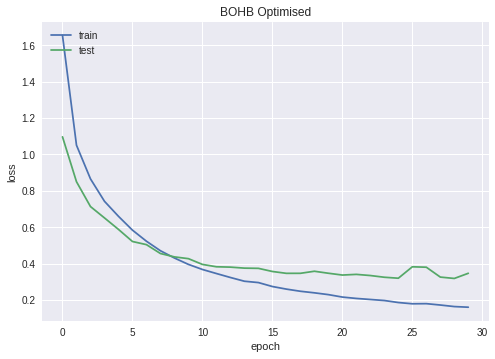

In [0]:
config = {'activation': 'relu', 'batch_size': 3, 'dense_units': 110, 'lr': 5.103817425944183e-05, 'number_of_layers': 1, 'optimizer': 'adam'}
df1 = pd.read_csv("BC_Data1.csv")
X = pd.DataFrame(data=df1,columns= ['Age', 'Tumor Size','Nodes','KI67','Basal-like Score','Luminal A Score','Luminal B Score', 'HER2-enriched Score',
                            'Normal Score','ESR1 Score','ERBB2 Score','PGR Score','Proliferation Score','Luminal Score',
                            'ACTR3B','ANLN','BAG1','BCL2','BLVRA','CCNE1','CDC6','CDH3','CXXC5', 'EGFR' ,'ERBB2', 'ESR1','EXO1', 'FGFR4',
                            'FOXA1', 'FOXC1', 'GRB7', 'KRT14', 'KRT17','KRT5', 'MAPT','MDM2','MIA','MLPH','MMP11', 'MYBL2', 'MYC', 'NAT1',
                            'ORC6L', 'PGR', 'PHGDH', 'SFRP1' , 'SLC39A6', 'UBE2T' ,'CDC20' ,'MKI67', 'RRM2','TYMS', 'UBE2C', 'CENPF', 'GPR160',
                            'KIF2C', 'MELK', 'TMEM45B', 'BIRC5', 'CCNB1','CDCA1','CEP55', 'KNTC2','PTTG1'])
X['KI67'] = X['KI67'].fillna(0)
y = pd.DataFrame(data=df1,columns= ['Subtype Prediction'])
X = np.array(X).astype(np.float64)
y = np.array(y)
one = OneHotEncoder() #initiate class
y = one.fit_transform(y)
X,y = shuffle(X,y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.1)


run_model(config,30)